# Import Libraries

In [1]:
# import libraries
import os
import PIL
import numpy as np
from scipy import spatial
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

# Import PCam dataset

In [2]:
ds = tfds.load('patch_camelyon', as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating test examples...:   0%|          | 0/32768 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/patch_camelyon/2.0.0.incompleteWNWGST/patch_camelyon-test.tfrecord*...:   …

Generating train examples...:   0%|          | 0/262144 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/patch_camelyon/2.0.0.incompleteWNWGST/patch_camelyon-train.tfrecord*...:  …

Generating validation examples...:   0%|          | 0/32768 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/patch_camelyon/2.0.0.incompleteWNWGST/patch_camelyon-validation.tfrecord*.…

Dataset patch_camelyon downloaded and prepared to /root/tensorflow_datasets/patch_camelyon/2.0.0. Subsequent calls will reuse this data.


Label:  0


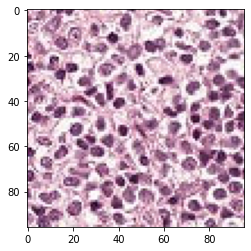

In [7]:
# Show an image example
sample_image, label = next(iter(ds['train']))
plt.imshow(sample_image)
print('Label: ',label.numpy())

# Generate an Average Image that resembles the average pixel values of the target dataset: PCam train set

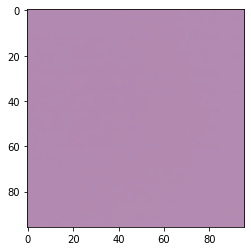

In [4]:
# image size
size = 96
# number of images in the PCam train set
n = 262144

# create a blank image
arr = np.zeros((size,size,3),np.float64)

for item in ds['train'].take(n):
  (image, label) = item
  imarr=np.array(image, dtype=np.float64)
  arr=arr+imarr

# get mean pixel value 
arr=arr/n 

# Round values in array and cast as 8-bit integer
arr=np.array(np.round(arr),dtype=np.uint8)

# Generate, save and preview final image
out=PIL.Image.fromarray(arr,mode="RGB")
out.save("Average.png")
plt.imshow(out)

In [5]:
# functions that identify the most dominant colour from an image
def find_dominant_color_filename(filename):
        #Resizing parameters
        width, height = 96,96
        image = PIL.Image.open(filename)
        image = image.resize((width, height),resample = 0)
        #Get colors from image object
        pixels = image.getcolors(width * height)
        #Sort them by count number(first element of tuple)
        sorted_pixels = sorted(pixels, key=lambda t: t[0])
        #Get the most frequent color
        dominant_color = sorted_pixels[-1][1]
        return dominant_color

def find_dominant_color_numpy(image):
        #Resizing parameters
        image = PIL.Image.fromarray(np.uint8(image)).convert('RGB')
        #Get colors from image object
        pixels = image.getcolors(96 * 96)
        #Sort them by count number(first element of tuple)
        sorted_pixels = sorted(pixels, key=lambda t: t[0])
        #Get the most frequent color
        dominant_color = sorted_pixels[-1][1]
        return dominant_color

In [8]:
# Example to show the dominant colour in RGB format for the sample image
result = find_dominant_color_numpy(sample_image)
print(result)

(255, 244, 255)


In [9]:
# Example to show the dominant colour in RGB format for the Average image
result = find_dominant_color_filename('/content/Average.png')
print(result)

(179, 138, 177)


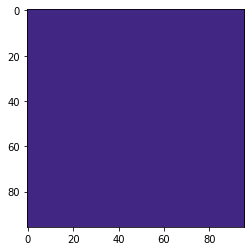

In [10]:
# Example to generate an image based on the dominant colour
arr = np.full((size, size, 3), [65, 38, 131], dtype=('uint8'))
plt.imshow(arr)

# Temp1

use cosine similarity to find the most similar image to the Average.png from PCam test set

In [13]:
# number of image in PCam train set
n = 262144
index = 0
value = 0

# read Average.png and flatten the array
average_image = PIL.Image.open('Average.png')
im_array1 = np.array(average_image)
im_array1_flatten = im_array1.flatten()
im_array1_flatten = im_array1_flatten/255

for item in ds['train'].take(n):
  (image, label) = item

  # convert the images to (R,G,B) arrays
  im_array2 = np.array(image)

  # flatten the arrays so they are 1 dimensional vectors
  im_array2_flatten = im_array2.flatten()

  # divide the arrays by 255, the maximum RGB value to make sure every value is on a 0-1 scale
  im_array2_flatten = im_array2_flatten/255

  # cosine similarity 
  similarity = -1 * (spatial.distance.cosine(im_array1_flatten, im_array2_flatten) - 1)


  # save the most similar image
  if value == 0:
    value = similarity
    result_index = index
    out=PIL.Image.fromarray(im_array2,mode="RGB")
    out.save("Temp1.png")
    print(result_index)
  
  elif value != 0 and value < similarity:
    value = similarity
    result_index = index
    print('Found a bigger similarity')
    out=PIL.Image.fromarray(im_array2,mode="RGB")
    out.save("Temp1.png")
    print(result_index)

  index += 1
 


0
Found a bigger similarity
1
Found a bigger similarity
10
Found a bigger similarity
22
Found a bigger similarity
56
Found a bigger similarity
81
Found a bigger similarity
495
Found a bigger similarity
2096
Found a bigger similarity
9219
Found a bigger similarity
20426
Found a bigger similarity
48275


/usr/local/lib/python3.8/dist-packages/scipy/spatial/distance.py:699: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


Found a bigger similarity
56705


# It is found that 56705, 48275, 20426, 9219, 2096 and 495 are not valid, thus 81 is picked as Temp 1

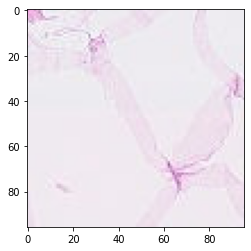

In [14]:
ds_list = list(ds['train'])
image, label = ds_list[81]
plt.imshow(image)

out=PIL.Image.fromarray(image.numpy(),mode="RGB")
out.save("Temp1.png")

# Temp 2

In [15]:
n = 262144

index = 0
value = 0

# get the most dominant colour from the Average.png
average_tuple = find_dominant_color_filename('/content/Average.png')
average_image = np.full((96, 96, 3), [average_tuple[0], average_tuple[1], average_tuple[2]], dtype=('uint8'))


im_array1 = np.array(average_image)
im_array1_flatten = im_array1.flatten()
im_array1_flatten = im_array1_flatten/255


for item in ds['train'].take(n):
  (image, label) = item

  
  # convert the images to (R,G,B) arrays
  target_image = np.array(image)
  target_tuple = find_dominant_color_numpy(target_image)
  image = np.full((96, 96, 3), [target_tuple[0], target_tuple[1], target_tuple[2]], dtype=('uint8'))

  im_array2 = np.array(image)
  im_array2_flatten = im_array2.flatten()
  im_array2_flatten = im_array2_flatten/255


 
  similarity = -1 * (spatial.distance.cosine(im_array1_flatten, im_array2_flatten) - 1)


  if value == 0:
    value = similarity
    result_index = index
    out=PIL.Image.fromarray(target_image,mode="RGB")
    out.save("Temp2.png")
    print(result_index)

  
  elif value != 0 and similarity > value:
    value = similarity
    result_index = index
    print('Found a bigger similarity')
    out=PIL.Image.fromarray(target_image,mode="RGB")
    out.save("Temp2.png")
    print(result_index)


  index += 1

0
Found a bigger similarity
3
Found a bigger similarity
5
Found a bigger similarity
9
Found a bigger similarity
15
Found a bigger similarity
40
Found a bigger similarity
41
Found a bigger similarity
88
Found a bigger similarity
14528


/usr/local/lib/python3.8/dist-packages/scipy/spatial/distance.py:699: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


Found a bigger similarity
40439


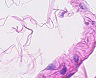

In [16]:
# crop the black image part
area = (0, 0, 96, 78)
img_target=PIL.Image.open("/content/Temp2.png") 
img_target = img_target.crop(area)
display(img_target)
img_target = img_target.save("Temp2.png")

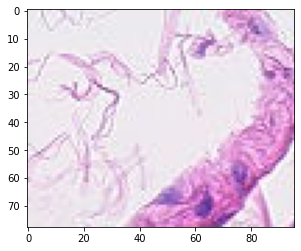

In [22]:
temp2=PIL.Image.open("/content/Temp2.png") 
plt.imshow(temp2)

# Temp 3

In [17]:
from sklearn.metrics import mean_squared_error


n = 262144
index = 0
value = 0


average_image = PIL.Image.open('Average.png')
im_array1 = np.array(average_image)
im_array1_flatten = im_array1.flatten()
im_array1_flatten = im_array1_flatten/255
for item in ds['train'].take(n):
  (image, label) = item

  
  # convert the images to (R,G,B) arrays
  im_array2 = np.array(image)
  im_array2_flatten = im_array2.flatten()

  # divide the arrays by 255, the maximum RGB value to make sure every value is on a 0-1 scale
  im_array2_flatten = im_array2_flatten/255

  mse = mean_squared_error(im_array1_flatten, im_array2_flatten)


  if value == 0:
    value = mse
    result_index = index
    out=PIL.Image.fromarray(im_array2,mode="RGB")
    out.save("Temp3.png")
    print(result_index)


  
  elif value != 0 and value > mse:
    value = mse
    result_index = index
    print('Found a lower mse')
    out=PIL.Image.fromarray(im_array2,mode="RGB")
    out.save("Temp3.png")
    print(result_index)


  index += 1
 


0
Found a lower mse
4
Found a lower mse
5
Found a lower mse
8
Found a lower mse
17
Found a lower mse
56
Found a lower mse
87
Found a lower mse
1372
Found a lower mse
1647
Found a lower mse
1854
Found a lower mse
2771
Found a lower mse
3765
Found a lower mse
11809


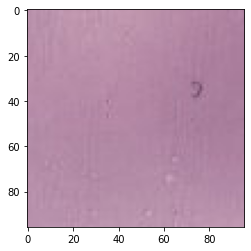

In [21]:
temp3=PIL.Image.open("/content/Temp3.png") 
plt.imshow(temp3)

# Temp4

In [18]:
from skimage.metrics import structural_similarity as ssim


n = 262144
index = 0
value = 0

average_image = PIL.Image.open('Average.png')
im_array1 = np.array(average_image)

for item in ds['train'].take(n):
  (image, label) = item 
  im_array2 = np.array(image)
  ssim_score = ssim(im_array1, im_array2, multichannel = True)
  # print(similarity)

  if value == 0:
    value = ssim_score
    result_index = index
    out=PIL.Image.fromarray(im_array2,mode="RGB")
    out.save("Temp4.png")
    print(result_index)


  
  elif value != 0 and value < ssim_score:
    value = ssim_score
    result_index = index
    print('Found a higher ssim')
    out=PIL.Image.fromarray(im_array2,mode="RGB")
    out.save("Temp4.png")
    print(result_index)


  index += 1
 


0
Found a higher ssim
1
Found a higher ssim
10
Found a higher ssim
59
Found a higher ssim
240
Found a higher ssim
302
Found a higher ssim
1554
Found a higher ssim
2000
Found a higher ssim
2254
Found a higher ssim
12438
Found a higher ssim
108199


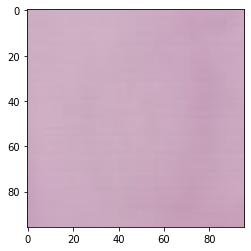

In [20]:
temp4=PIL.Image.open("/content/Temp4.png") 
plt.imshow(temp4)

# Temp 5

In [12]:
from sklearn.metrics import mean_squared_error
# mse = mean_squared_error(A, B)

# Find the most similar image from the dataset based on the average image
n = 262144

index = 0
value = 0

average_tuple = find_dominant_color_filename('/content/Average.png')
average_image = np.full((96, 96, 3), [average_tuple[0], average_tuple[1], average_tuple[2]], dtype=('uint8'))


im_array1 = np.array(average_image)

im_array1_flatten = im_array1.flatten()
im_array1_flatten = im_array1_flatten/255


for item in ds['train'].take(n):
  (image, label) = item

  
  # convert the images to (R,G,B) arrays
  target_image = np.array(image)
  target_tuple = find_dominant_color_numpy(target_image)
  image = np.full((96, 96, 3), [target_tuple[0], target_tuple[1], target_tuple[2]], dtype=('uint8'))

  im_array2 = np.array(image)
  im_array2_flatten = im_array2.flatten()
  im_array2_flatten = im_array2_flatten/255



  mse = mean_squared_error(im_array1_flatten, im_array2_flatten)
  # print(similarity)

  if value == 0:
    value = mse
    result_index = index
    out=PIL.Image.fromarray(target_image,mode="RGB")
    out.save("Temp5.png")
    print(result_index)


  
  elif value != 0 and mse < value:
    value = mse
    result_index = index
    print('Found a lower mse')
    out=PIL.Image.fromarray(target_image,mode="RGB")
    out.save("Temp5.png")
    print(result_index)


  index += 1
 


0
Found a lower mse
1
Found a lower mse
4
Found a lower mse
14
Found a lower mse
39
Found a lower mse
147
Found a lower mse
1372
Found a lower mse
1715
Found a lower mse
1872
Found a lower mse
2959
Found a lower mse
11224


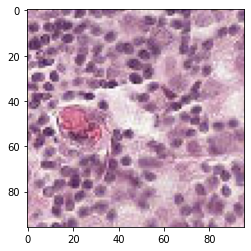

In [19]:
temp5=PIL.Image.open("/content/Temp5.png") 
plt.imshow(temp5)